In [1]:
import pandas as pd
import numpy as np
import seaborn as sns;
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/4_Chap4.csv")
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,443,49,79,76,8,15,205
1,290,27,70,31,6,6,129
2,676,115,92,130,0,9,339
3,536,92,62,92,5,8,247
4,481,67,42,94,16,3,202


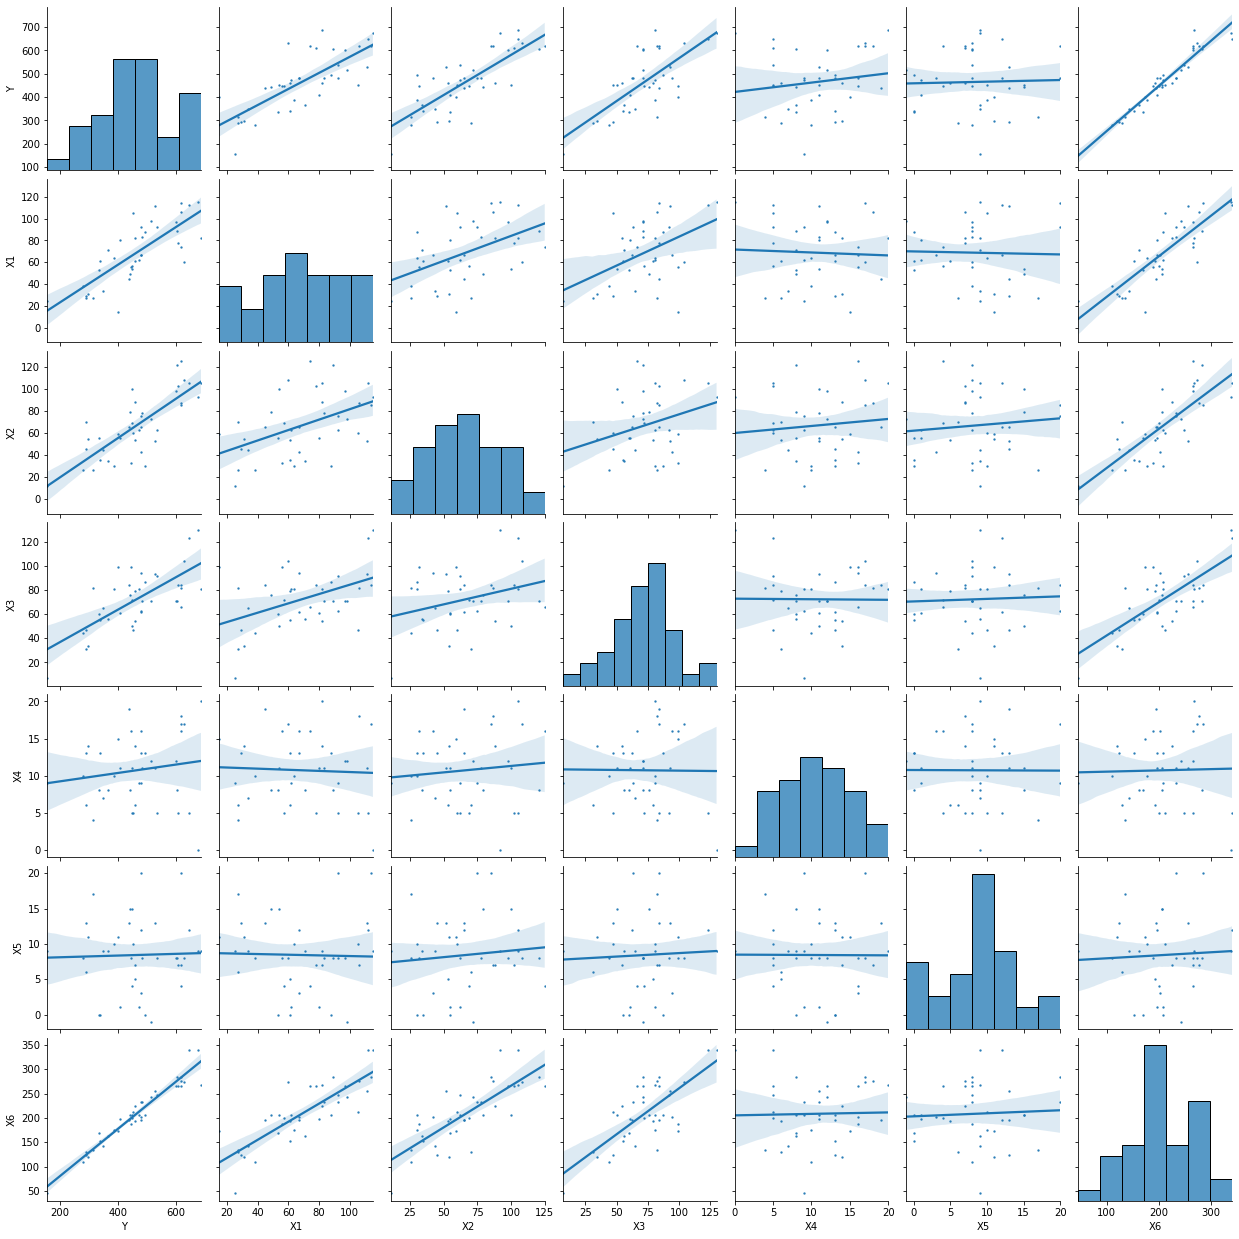

In [3]:
sns.pairplot(df, aspect=1, kind="reg", plot_kws=dict(scatter_kws=dict(s=2)))

<AxesSubplot:>

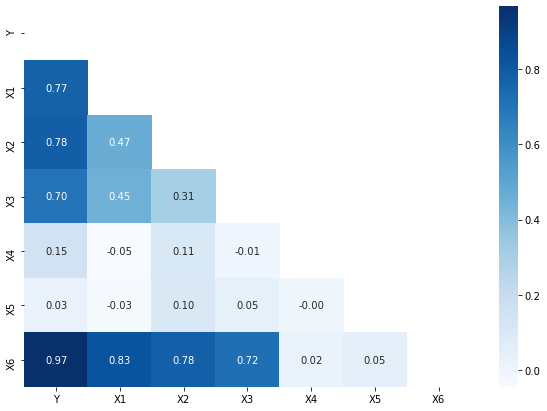

In [4]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), mask=mask, annot=True, fmt=".2f", cmap="Blues")

In [5]:
target = df[['Y']]
x_data1 = df.iloc[:, 1:]
x_data1_1 = sm.add_constant(x_data1, has_constant="add")
model1 = sm.OLS(target, x_data1_1)
fitted_model1 = model1.fit()
fitted_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     119.3
Date:                Tue, 25 May 2021   Prob (F-statistic):           6.34e-21
Time:                        16:06:20   Log-Likelihood:                -186.91
No. Observations:                  40   AIC:                             387.8
Df Residuals:                      33   BIC:                             399.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.1772     22.076      1.593      0.121      -9.736      80.090
X1             2.8547      5.337      0.535      0.596      -8.004      13.713
X2             3.2753      5.333      0.614      0.543      -7.575      14.125
X3             3.1863      5.289      0.602      0.551      -7.574      13.946
X4             3.1878      0.992      3.214      0.003       1.170       5.206
X5            -0.6677      0.893     -0.747      0.460      -2.485       1.150
X6            -1.1658      5.322     -0.219      0.828     -11.993       9.661
==============================================================================
Omnibus:                        1.172   Durbin-Watson:                   2.305
Prob(Omnibus):                  0.556   Jarque-Bera (JB):                0.435
Skew:                           0.181   Prob(JB):                        0.805
Kurtosis:                       3.360   Cond. No.                     1.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
# create instance of influence
influence = fitted_model1.get_influence()

# obtain standardized residuals
standardized_residuals = influence.resid_studentized_internal

# DataFrame에 표준화 잔차 담기
resid = pd.DataFrame({'res' : standardized_residuals})
idx = pd.DataFrame({i for i in range(0, len(standardized_residuals))})

In [7]:
np.array(resid['res'])

array([-0.35129222, -0.58952638, -0.07792919,  0.71249421,  0.16181961,
       -0.43825841,  0.39778121,  0.07611439, -0.75045785, -1.00173894,
        0.48758659,  0.90155776, -1.10326197, -0.36310949,  0.54165867,
       -0.65044607,  1.8765567 ,  0.07800872,  0.66966062,  1.40132735,
        0.43815173,  0.16345503, -0.46724397, -1.89358118,  1.25027988,
        0.30855896, -1.03274658,  0.46605746,  0.11520419, -0.22949685,
        0.6721779 ,  0.28359222,  1.24624608, -2.17595912,  0.58516174,
       -0.88199971, -0.4733332 ,  2.77404672, -1.28477977, -1.69798312])

In [8]:
cdis = influence.cooks_distance[0]
cdis

array([2.14231324e-03, 1.24256541e-02, 4.74490149e-04, 7.39667285e-03,
       1.27983525e-03, 5.37524423e-03, 8.28387298e-03, 4.27714018e-04,
       1.36865641e-02, 5.45949061e-02, 4.98391607e-03, 4.37099317e-02,
       3.44324867e-02, 5.76399553e-03, 2.59474755e-02, 1.47613086e-02,
       8.97910089e-02, 1.42380432e-04, 8.70593511e-03, 2.64029898e-02,
       3.85159123e-03, 8.32118264e-04, 5.79566666e-03, 8.21860718e-02,
       2.79799124e-02, 3.44666290e-03, 5.69953980e-03, 1.05317033e-02,
       3.97004015e-04, 7.44292281e-04, 8.99601239e-03, 1.11263339e-03,
       6.89205737e-02, 2.07215761e-01, 7.04266322e-03, 1.68280034e-02,
       5.45390298e-03, 2.47547247e-01, 2.55334560e-02, 4.03274572e-02])

In [9]:
dfits = influence.dffits[0]
dfits

array([-0.12081534, -0.29196157, -0.05675715,  0.2258144 ,  0.09324305,
       -0.19157273,  0.23769905,  0.05388674, -0.30743417, -0.61822805,
        0.18459607,  0.55153429, -0.49262   , -0.19819751,  0.42155459,
       -0.31858948,  0.82601415,  0.03109082,  0.24476305,  0.43653163,
        0.16216386,  0.07518573, -0.19900321, -0.79112205,  0.44650674,
        0.1531771 , -0.19994985,  0.26825656,  0.05192205, -0.07113538,
        0.24882024,  0.08701076,  0.70066389, -1.28147269,  0.21978621,
       -0.34202948, -0.19306344,  1.48031031, -0.42713445, -0.54767086])

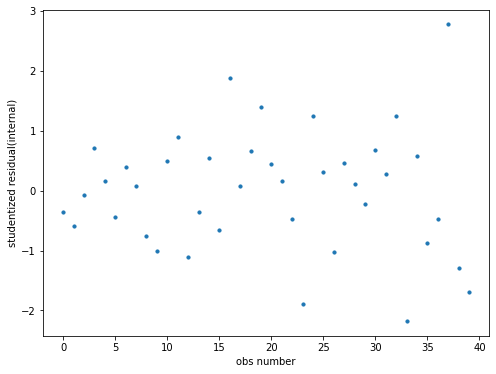

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(x = idx, y=standardized_residuals, s=10)
plt.xlabel('obs number')
plt.ylabel('studentized residual(internal)')
plt.show()

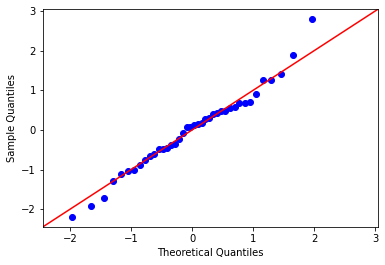

In [11]:
fig = sm.qqplot(resid['res'], fit=True, line='45')

In [12]:
cdis = influence.cooks_distance[0]
dfits = influence.dffits[0]
influential = pd.DataFrame({"Cook's Distance" : cdis, "DFITS" : dfits})
influential.describe()

,Cook's Distance,DFITS
count,40.000000,40.000000
mean,0.028279,0.013794
std,0.051592,0.471765
min,0.000142,-1.281473
25%,0.003750,-0.222953
50%,0.008495,0.052904
75%,0.026797,0.239465
max,0.247547,1.480310


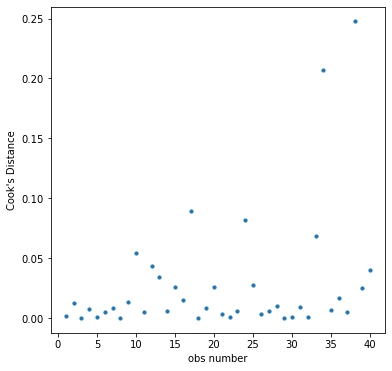

In [13]:
fig = plt.figure(figsize=(6,6))
idx = range(1, 41)
plt.scatter(idx, cdis, s=10)
plt.xlabel('obs number')
plt.ylabel("Cook's Distance")
plt.show()

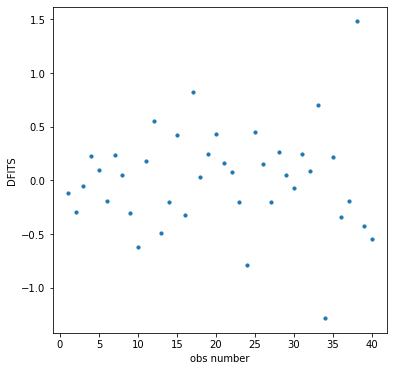

In [14]:
fig = plt.figure(figsize=(6,6))
plt.scatter(idx, dfits, s=10)
plt.xlabel('obs number')
plt.ylabel('DFITS')
plt.show()

In [19]:
resid[['res']][(resid['res']>2) | (resid['res']<-2)] 

,res
33,-2.175959
37,2.774047


In [25]:
n = df.shape[0]
p = x_data1.shape[1]
x = np.sqrt((p+1)/(n-p-1))
influential[(cdis>0.2) | ((dfits>x) | (dfits<-x))] 

,Cook's Distance,DFITS
9,0.054595,-0.618228
11,0.043710,0.551534
12,0.034432,-0.492620
16,0.089791,0.826014
23,0.082186,-0.791122
32,0.068921,0.700664
33,0.207216,-1.281473
37,0.247547,1.480310
39,0.040327,-0.547671


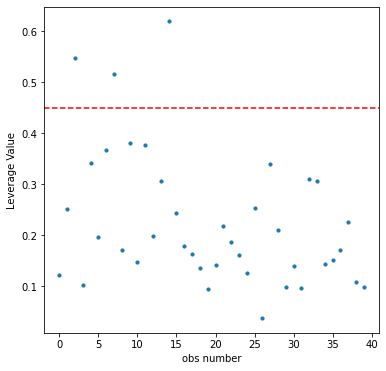

In [27]:
laverage = influence.hat_diag_factor
mean_h = np.sum(laverage)/len(laverage) # 평균 레버리지
fig = plt.figure(figsize=(6,6))
idx = range(0, df.shape[0])
plt.scatter(idx, laverage, s=10)
plt.axhline(2*mean_h,linestyle='--',color='red')
plt.xlabel('obs number')
plt.ylabel('Leverage Value')
plt.show()

In [31]:
pd.DataFrame({"Laverage":laverage})[laverage>2*mean_h]

,Laverage
2,0.546921
7,0.516795
14,0.619073
